In [1]:
import requests
from xml.etree import ElementTree as ET

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import anderson
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
import os   

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## DATASET

In [5]:
raw_fog = pd.read_csv(f'C:/Users/LG/PythonDataWorkspace/DATA STUDY/data/fog_train.csv', encoding = 'euc-kr')
fog_test = pd.read_csv(f'C:/Users/LG/PythonDataWorkspace/DATA STUDY/data/fog_test.csv', encoding = 'euc-kr')

raw_fog

,Unnamed: 0,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
0,1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
1,2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
2,3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
3,4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
4,5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,3156455,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4
3156455,3156456,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4
3156456,3156457,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4
3156457,3156458,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4


In [6]:
raw_fog[raw_fog['fog_train.class'] < -90]

,Unnamed: 0,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
7645,7646,I,2,23,2,20,AA,272.0,1.3,-0.9,0.0,61.1,0.00,-1.0,-99,-99
7780,7781,I,2,24,0,50,AA,140.7,1.2,2.1,0.0,59.5,0.00,0.8,-99,-99
16053,16054,I,4,21,11,40,AA,271.7,7.0,9.2,0.0,42.8,0.32,16.7,-99,-99
16054,16055,I,4,21,11,50,AA,276.4,6.0,9.3,0.0,43.4,0.26,19.0,-99,-99
16055,16056,I,4,21,12,0,AA,268.4,5.9,9.5,0.0,41.7,0.48,21.1,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155926,3155927,K,12,28,7,10,EC,307.9,4.3,2.0,0.0,62.6,0.00,-1.4,-99,-99
3155961,3155962,K,12,28,13,0,EC,294.5,6.1,6.7,0.0,41.3,0.32,15.2,-99,-99
3156100,3156101,K,12,29,12,10,EC,16.3,3.5,4.7,0.0,43.2,0.34,14.6,-99,-99
3156135,3156136,K,12,29,18,0,EC,314.4,8.8,3.5,0.0,42.0,0.00,1.6,-99,-99


In [7]:
def raw_data_preprocessing_train(dataset):

    fog_data = dataset.copy()

    fog_data = fog_data.drop(['Unnamed: 0'], axis = 1)

    fog_data = fog_data.replace(-99, np.NaN)

    columns = fog_data.columns
    columns = [column.replace('fog_train.', "") for column in columns]
    fog_data.columns = columns
    fog_data = fog_data.drop(['class'], axis = 1)

    return fog_data

def raw_data_preprocessing_test(dataset):

    fog_data = dataset.copy()

    fog_data = fog_data.replace(-99.00, np.NaN)

    fog_data = fog_data.drop(['Unnamed: 0'], axis = 1)

    columns = fog_data.columns
    columns = [column.replace('fog_test.', "") for column in columns]
    fog_data.columns = columns
    fog_data = fog_data.drop(['class'], axis = 1)

    return fog_data

In [8]:
fog_data = raw_data_preprocessing_train(raw_fog)

fog_data = fog_data.drop(['year', 'month', 'day', 'time', 'minute'], axis = 1)

fog_test = raw_data_preprocessing_test(fog_test)

fog_test = fog_test.drop(['year', 'month', 'day', 'time', 'minute'], axis = 1)

fog_data

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1
0,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...
3156454,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0
3156455,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0
3156456,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0
3156457,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0


In [9]:
stn_list = fog_data['stn_id'].str[0]

fog_data['stn_id'] = stn_list

stn_encoding_df = pd.DataFrame({
    'stn_id' : ['A', 'B', 'C', 'D', 'E'],
    'stn_num' : [1, 2, 3, 4, 5]
})

stn_encoding_map = stn_encoding_df.set_index('stn_id')['stn_num'].to_dict()
# df를 series로 만든 후 dict형태로 변환하기
fog_data['stn_id'] = fog_data['stn_id'].map(stn_encoding_map)
fog_data

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1
0,1,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,1,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,1,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,1,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,1,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...
3156454,5,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0
3156455,5,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0
3156456,5,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0
3156457,5,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0


## REGRESSION

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### DATA preprocessing

#### basic

In [14]:
model_data = fog_data.copy()
model_data = model_data.dropna()
model_data

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1
0,1,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,1,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,1,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,1,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,1,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...
3156454,5,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0
3156455,5,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0
3156456,5,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0
3156457,5,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0


#### split

In [15]:
dataset_preprocessed = model_data.copy()

x = dataset_preprocessed.drop(['vis1'], axis = 1)
y = dataset_preprocessed['vis1']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size= 0.75, random_state=42)
# stratify는 데이터 클래스의 비율을 일정한 수준으로 유지한채 데이터를 스플릿하는 함수임

### modeling

#### decision tree regressor

In [37]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_valid_pred = dt_model.predict(x_valid)
dt_rmse = mean_squared_error(y_valid, dt_valid_pred, squared=False)
dt_r2 = r2_score(y_valid, dt_valid_pred)

#### XGboost

In [38]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(x_train, y_train)
xgb_valid_pred = xgb_model.predict(x_valid)
xgb_rmse = mean_squared_error(y_valid, xgb_valid_pred, squared=False)
xgb_r2 = r2_score(y_valid, xgb_valid_pred)

LightGBM

In [39]:
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(x_train, y_train)
lgb_valid_pred = lgb_model.predict(x_valid)
lgb_rmse = mean_squared_error(y_valid, lgb_valid_pred, squared=False)
lgb_r2 = r2_score(y_valid, lgb_valid_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 2350457, number of used features: 8
[LightGBM] [Info] Start training from score 19777.409574


#### Catboost

In [40]:
cat_model = CatBoostRegressor(random_state=42)
cat_model.fit(x_train, y_train)
cat_valid_pred = cat_model.predict(x_valid)
cat_rmse = mean_squared_error(y_valid, cat_valid_pred, squared=False)
cat_r2 = r2_score(y_valid, cat_valid_pred)

Learning rate set to 0.139579
0:	learn: 11724.2682364	total: 181ms	remaining: 3m
1:	learn: 11522.6038319	total: 315ms	remaining: 2m 37s
2:	learn: 11364.7877179	total: 441ms	remaining: 2m 26s
3:	learn: 11238.4330593	total: 559ms	remaining: 2m 19s
4:	learn: 11137.7972129	total: 687ms	remaining: 2m 16s
5:	learn: 11055.8193451	total: 806ms	remaining: 2m 13s
6:	learn: 10990.4360022	total: 919ms	remaining: 2m 10s
7:	learn: 10934.5791726	total: 1.05s	remaining: 2m 10s
8:	learn: 10889.2279466	total: 1.16s	remaining: 2m 7s
9:	learn: 10850.6393960	total: 1.27s	remaining: 2m 5s
10:	learn: 10815.8439423	total: 1.37s	remaining: 2m 2s
11:	learn: 10785.0086444	total: 1.47s	remaining: 2m
12:	learn: 10758.1611453	total: 1.57s	remaining: 1m 58s
13:	learn: 10737.7729426	total: 1.67s	remaining: 1m 57s
14:	learn: 10716.6457896	total: 1.77s	remaining: 1m 56s
15:	learn: 10699.0475022	total: 1.87s	remaining: 1m 54s
16:	learn: 10684.0067603	total: 1.97s	remaining: 1m 53s
17:	learn: 10671.4259759	total: 2.07s	r

### test result

In [42]:
result_df = pd.DataFrame({
    'model' : ['dt', 'xgb', 'lgb', 'cat'],
    'rmse' : [dt_rmse, xgb_rmse, lgb_rmse, cat_rmse],
    'r2' : [dt_r2, xgb_r2, lgb_r2, cat_r2]
})

result_df = round(result_df, 5)
result_df

,model,rmse,r2
0,dt,12005.14887,-0.00194
1,xgb,9989.10026,0.30632
2,lgb,10201.90977,0.27645
3,cat,9905.85527,0.31783


In [43]:
with open('dt_all_data.pkl', 'wb') as file:
  pickle.dump(dt_model, file)

with open('xgb_all_data.pkl', 'wb') as file:
  pickle.dump(xgb_model, file)

with open('lgb_all_data.pkl', 'wb') as file:
  pickle.dump(lgb_model, file)

with open('cat_all_data.pkl', 'wb') as file:
  pickle.dump(cat_model, file)

In [44]:
sorted_y_valid = y_valid.sort_values()
sorted_xgb_pred = np.sort(xgb_valid_pred)

comp_result = pd.DataFrame({
    'y_valid' : sorted_y_valid,
    'xgb_predict' : sorted_xgb_pred
})

comp_result = comp_result.reset_index(drop = True)
comp_result

,y_valid,xgb_predict
0,1.0,-4430.549805
1,4.0,-3651.059570
2,4.0,-3581.244141
3,4.0,-3575.678711
4,4.0,-3543.698486
...,...,...
783481,60236.0,60029.851562
783482,60282.0,60228.628906
783483,60285.0,61067.691406
783484,60380.0,61677.679688


In [45]:
comp_result.describe()

,y_valid,xgb_predict
count,783486.000000,783486.000000
mean,19776.841046,19774.361328
std,11993.538950,6349.565430
min,1.000000,-4430.549805
25%,12500.000000,15906.437256
50%,20000.000000,19899.640625
75%,20000.000000,23425.872070
max,60471.000000,62681.875000


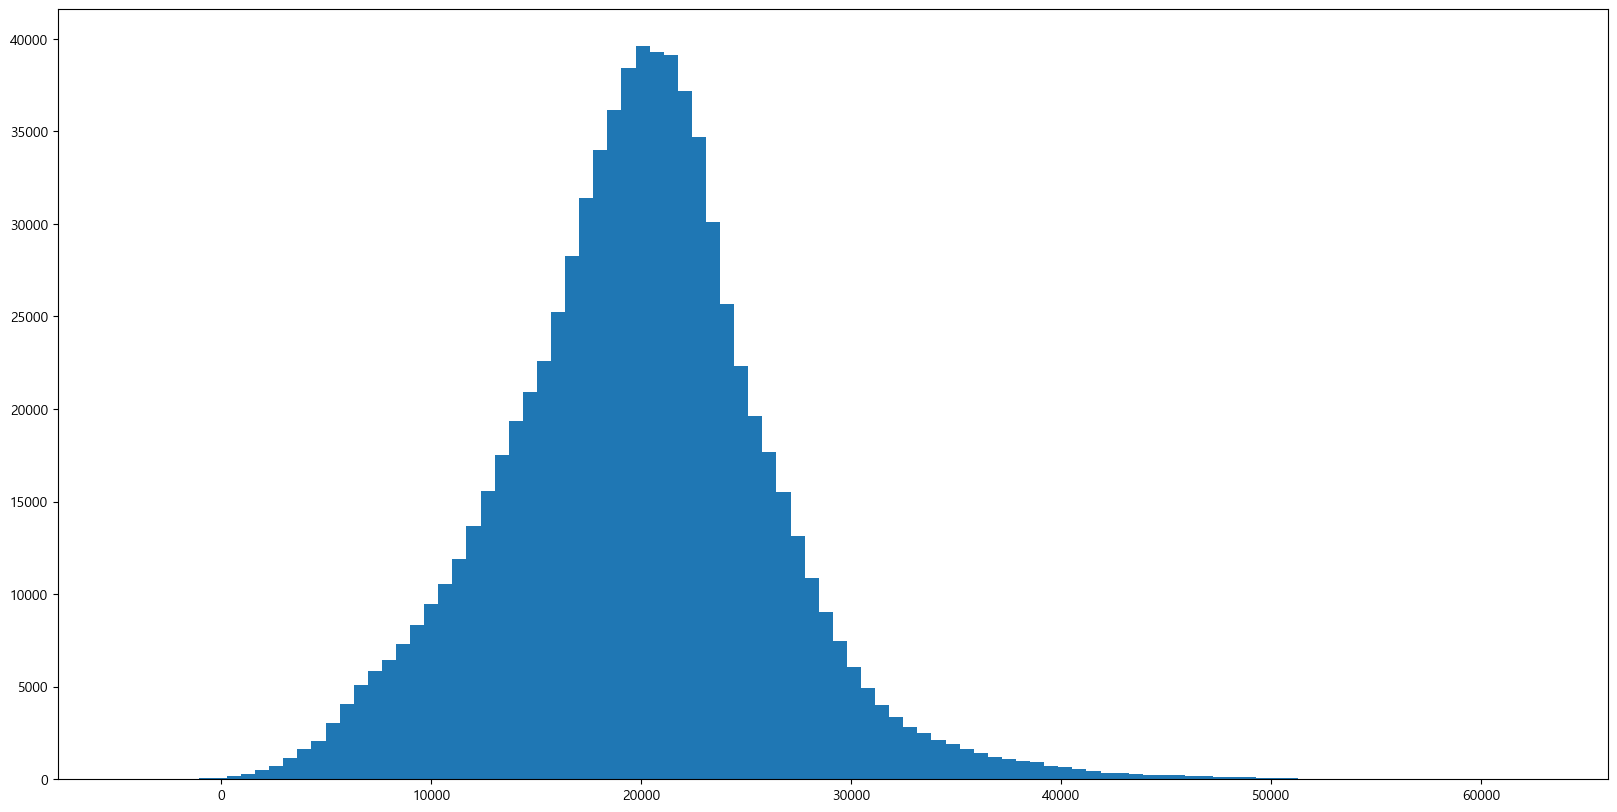

In [46]:
plt.figure(figsize = (20, 10))
plt.hist(xgb_valid_pred, bins = 100)
plt.show()

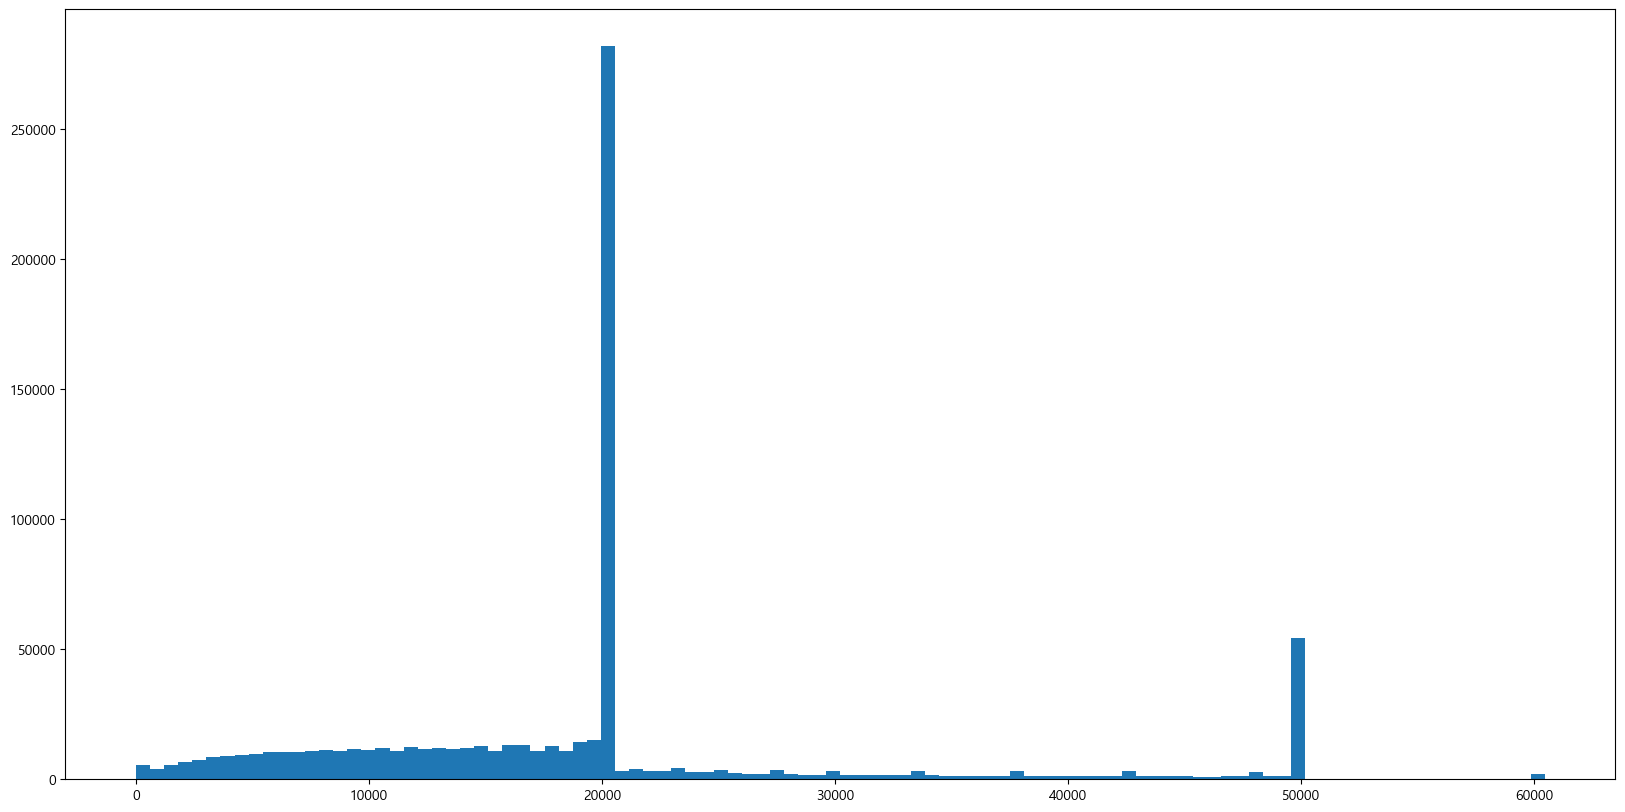

In [47]:
plt.figure(figsize = (20, 10))
plt.hist(y_valid, bins = 100)
plt.show()